# Data description

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).This dataset contains 8124 rows and 23 columns Each species is identified as definitely edible, definitely poisonous.In this dataset edible is denoted by 'e' and poisonous by 'p'. In the class column '1' for p and '0' for e.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


# Loading the Dataset

In [2]:
df=pd.read_csv("mushroom.csv")
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [3]:
df.shape  #checking the data dimension

(8124, 23)

In [4]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

We have 8124 rows and 23 columns including target

In [5]:
#statistical summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
# checking the null values in the set
df.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no null values in the dataset

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

There are 4208 edible mushrooms and 3916 poisonous mushrooms in our dataset

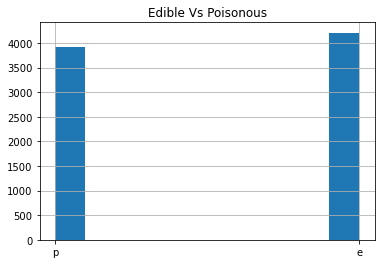

In [9]:
df["class"].hist(grid=True) # univariate analysis
plt.title('Edible Vs Poisonous')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


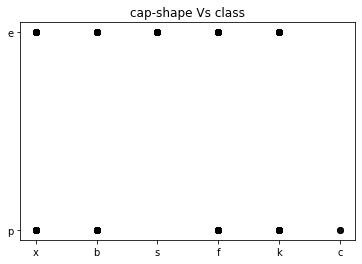

In [10]:
plt.scatter(df["cap-shape"],df["class"],alpha=0.5,c=(0,0,0))
plt.title('cap-shape Vs class')
plt.show()

# Data Manipulation

In [11]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column]=labelencoder.fit_transform(df[column])

In [12]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now all the columns are transferred to numeric values.there are no categorical values.

The column veil-type contains 0 only,not contributing any values to this data.So we are going to drop this column.

In [13]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int32

In [14]:
df=df.drop(['veil-type'],axis=1)

In [15]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


# Checking correlation

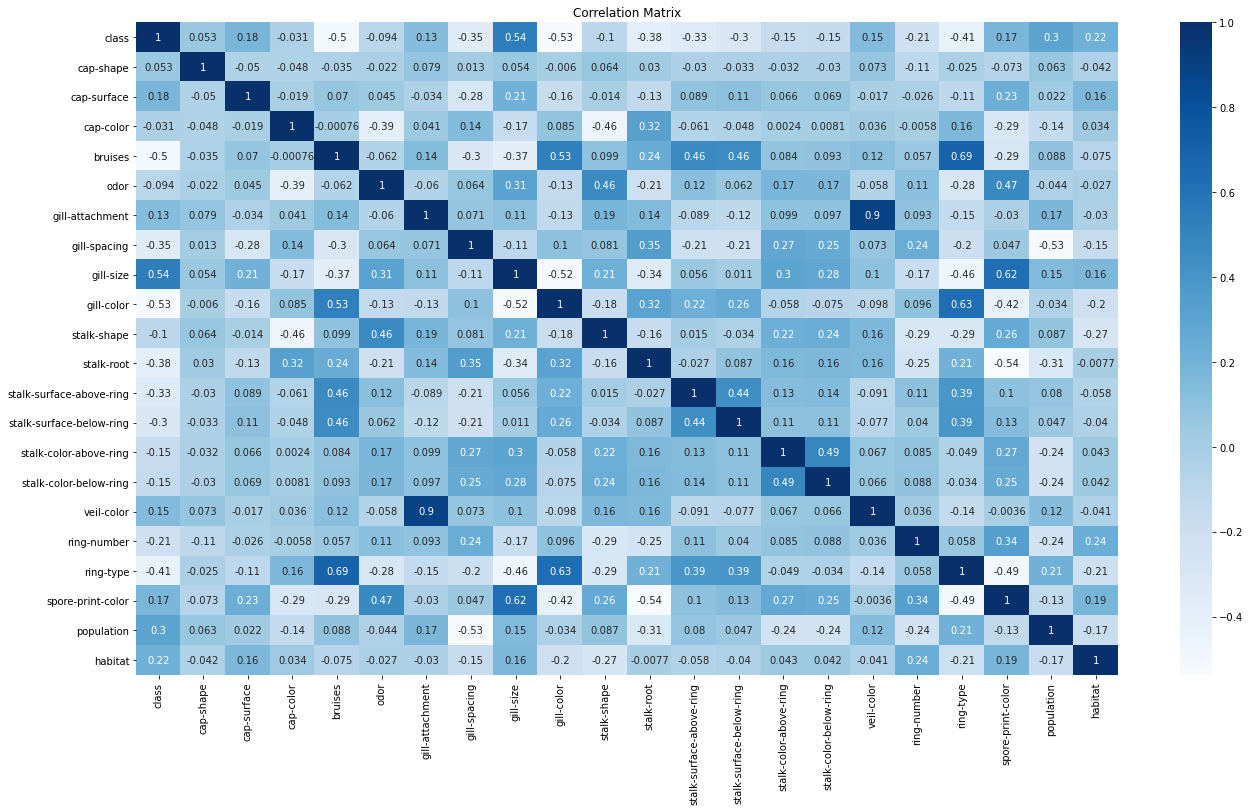

In [16]:
corr_mat=df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

Veil-color and gill-attachment are highly correlated.

# Checking data distribution among all columns 

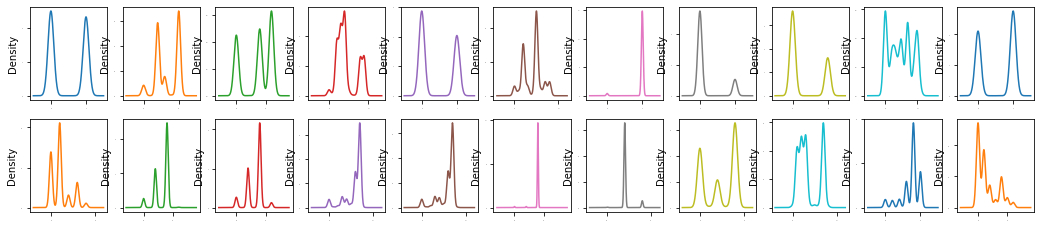

In [17]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

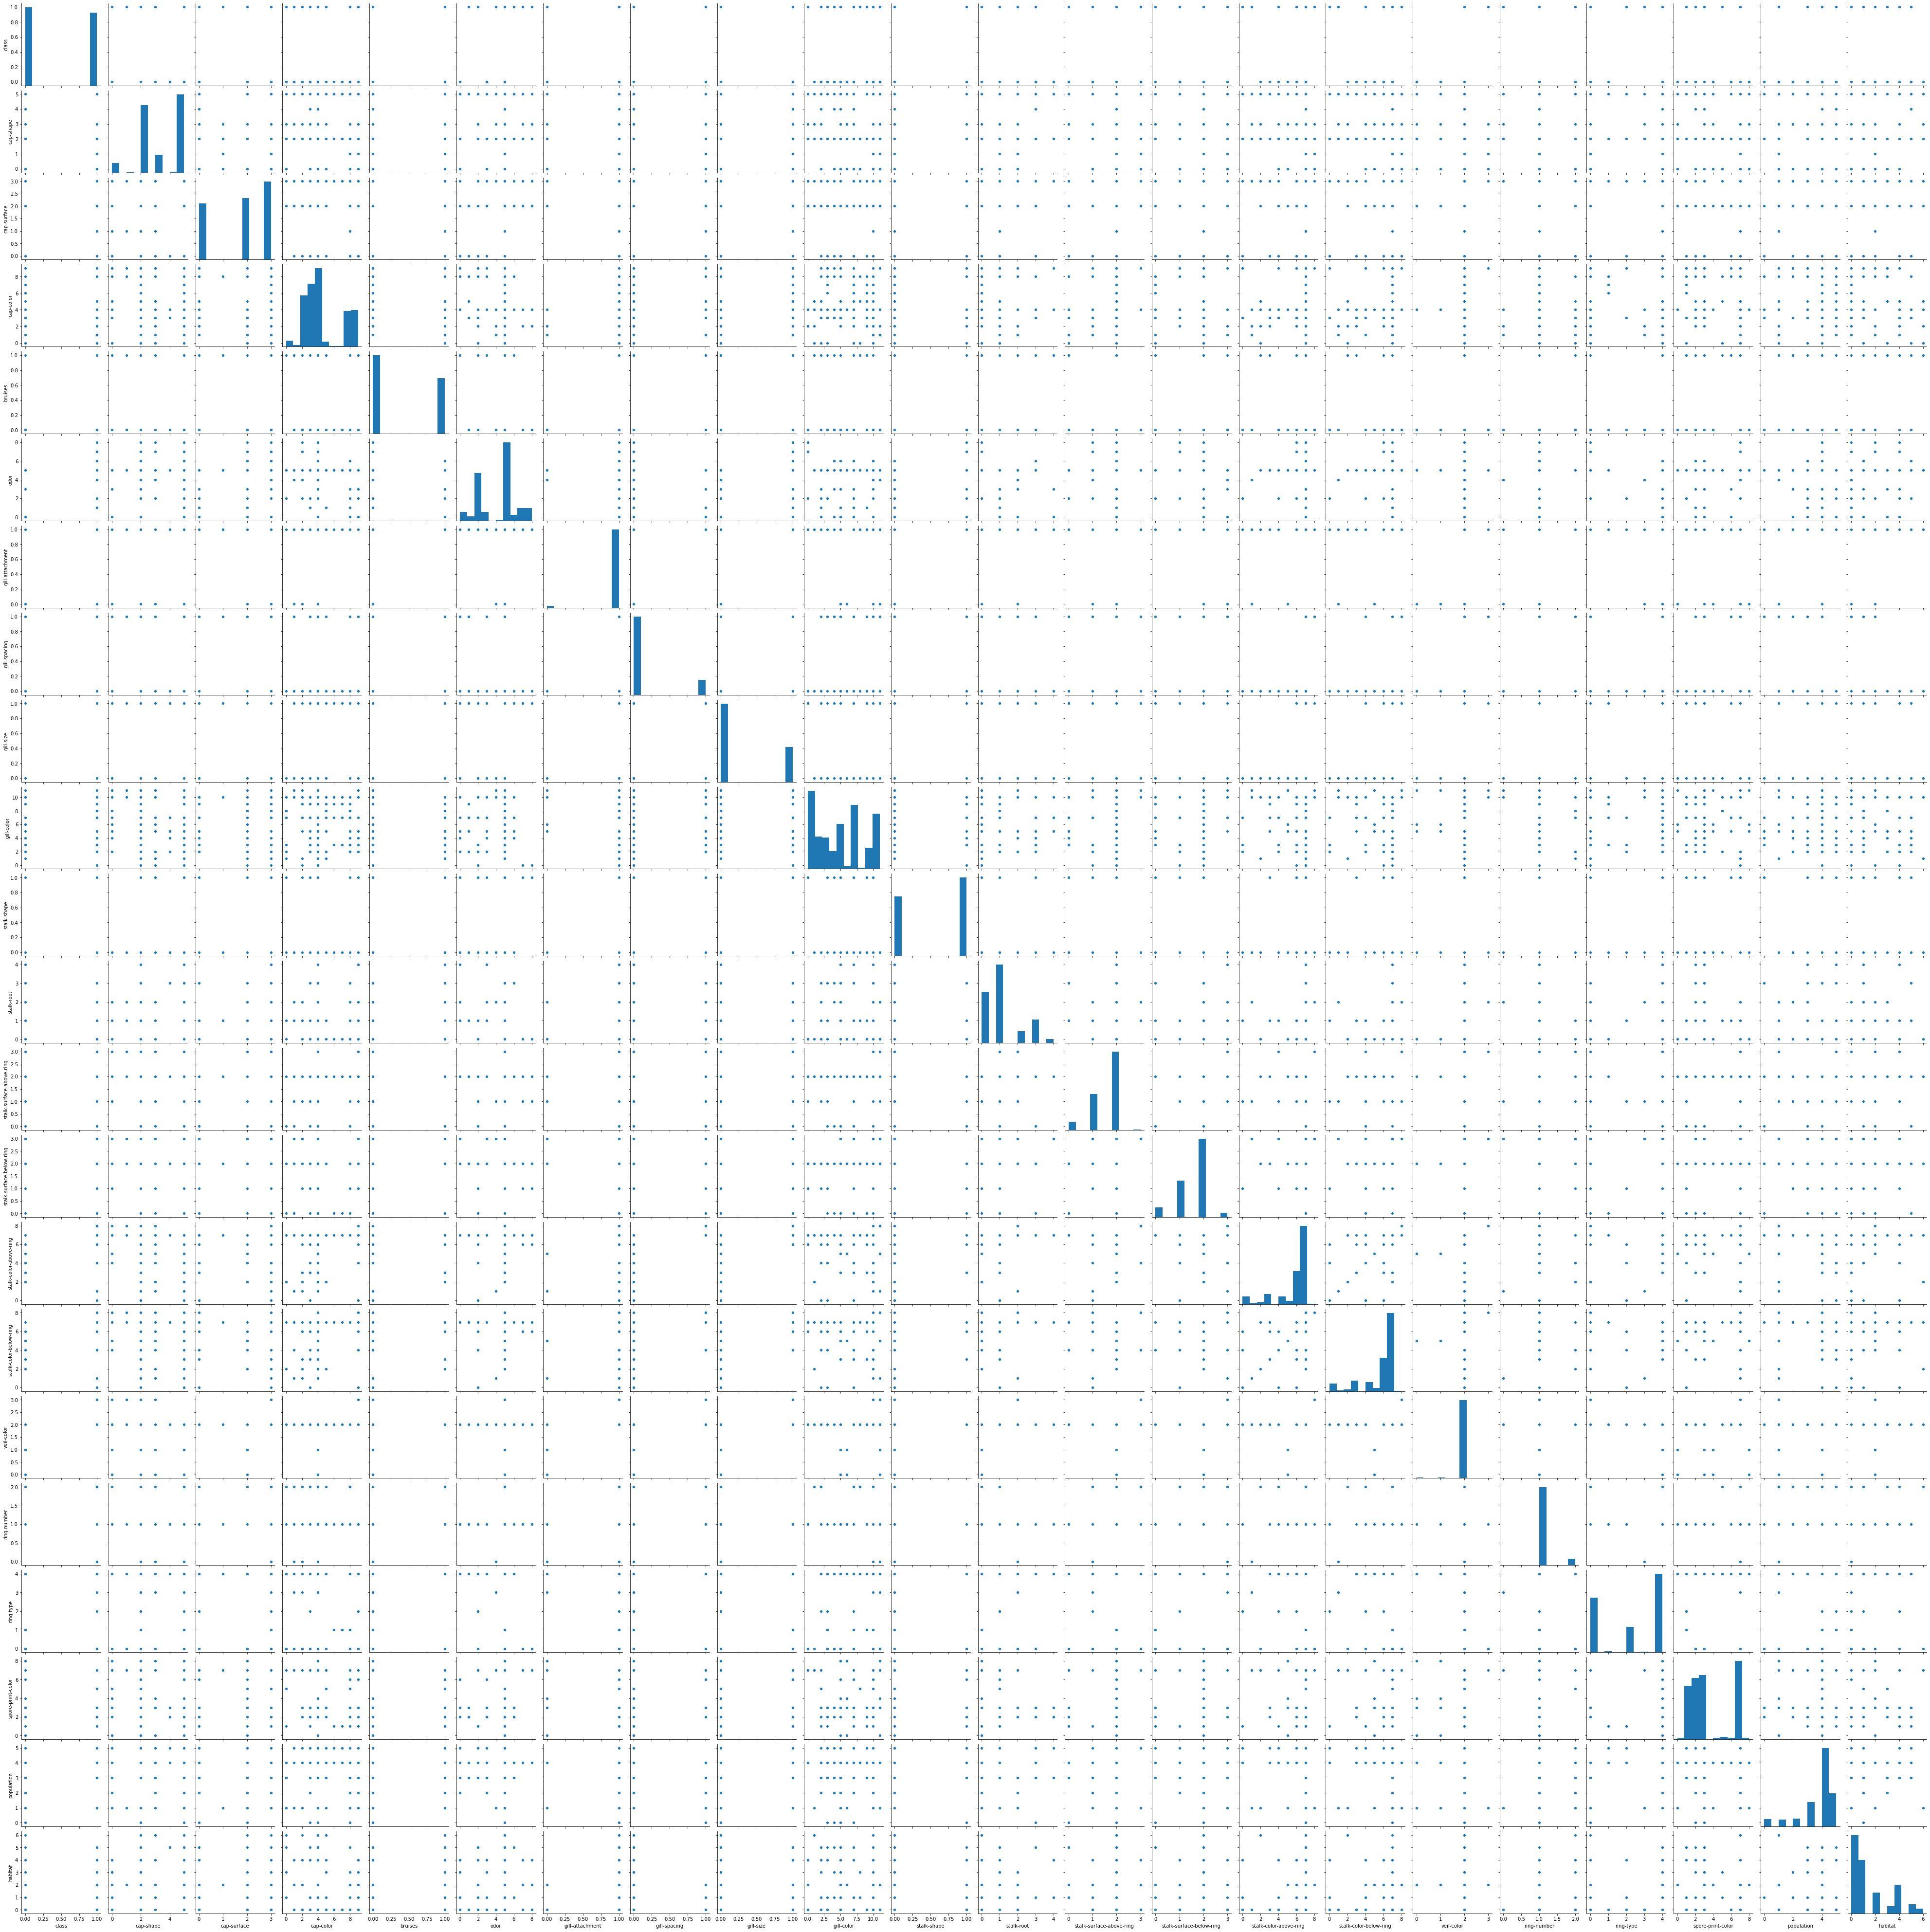

In [18]:
sns.pairplot(df)
plt.show()

In [19]:
# splitting the independent and target variable in x and y
x=df.drop('class',axis=1)
y=df['class']

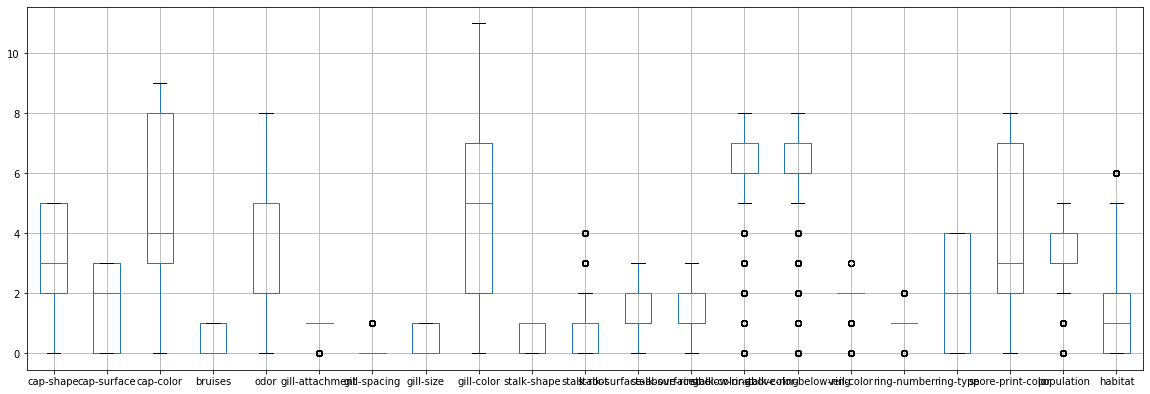

In [20]:
# plotting boxplot of all 22 columns
x.iloc[:,0:22].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Finding best random state

In [21]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state",maxRS)        

Best accuracy is 0.9589827727645611 on Random_state 233


we have found best random_state value as 233.we will create our train_test split using this random_state(233)

# Creating train_test split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=233)

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9589827727645611
[[1224   39]
 [  61 1114]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1263
           1       0.97      0.95      0.96      1175

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [24]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [25]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [26]:
y_pred_prob

array([1.87361078e-08, 9.95770290e-01, 2.12457260e-02, ...,
       9.98511537e-01, 9.99891149e-01, 9.98411532e-01])

In [27]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [28]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.91765637e-04,
       7.91765637e-04, 1.58353127e-03, 1.58353127e-03, 2.37529691e-03,
       2.37529691e-03, 3.16706255e-03, 3.16706255e-03, 3.95882819e-03,
       3.95882819e-03, 4.75059382e-03, 4.75059382e-03, 5.54235946e-03,
       5.54235946e-03, 6.33412510e-03, 6.33412510e-03, 7.12589074e-03,
       7.12589074e-03, 7.91765637e-03, 7.91765637e-03, 8.70942201e-03,
       8.70942201e-03, 9.50118765e-03, 9.50118765e-03, 1.02929533e-02,
       1.02929533e-02, 1.10847189e-02, 1.10847189e-02, 1.18764846e-02,
       1.18764846e-02, 1.26682502e-02, 1.26682502e-02, 1.34600158e-02,
       1.34600158e-02, 1.42517815e-02, 1.42517815e-02, 1.50435471e-02,
       1.50435471e-02, 1.66270784e-02, 1.66270784e-02, 1.74188440e-02,
       1.74188440e-02, 1.82106097e-02, 1.82106097e-02, 1.90023753e-02,
       1.90023753e-02, 1.97941409e-02, 1.97941409e-02, 2.13776722e-02,
       2.13776722e-02, 2.21694378e-02, 2.21694378e-02, 2.29612035e-02,
      

In [29]:
tpr

array([0.00000000e+00, 8.51063830e-04, 2.62978723e-01, 2.62978723e-01,
       2.64680851e-01, 2.64680851e-01, 2.72340426e-01, 2.72340426e-01,
       2.75744681e-01, 2.75744681e-01, 2.76595745e-01, 2.76595745e-01,
       2.93617021e-01, 2.93617021e-01, 2.99574468e-01, 2.99574468e-01,
       3.05531915e-01, 3.05531915e-01, 3.13191489e-01, 3.13191489e-01,
       3.24255319e-01, 3.24255319e-01, 3.28510638e-01, 3.28510638e-01,
       3.36170213e-01, 3.36170213e-01, 3.38723404e-01, 3.38723404e-01,
       5.60000000e-01, 5.60000000e-01, 7.53191489e-01, 7.53191489e-01,
       7.79574468e-01, 7.79574468e-01, 7.99148936e-01, 7.99148936e-01,
       8.64680851e-01, 8.64680851e-01, 8.68085106e-01, 8.68085106e-01,
       8.87659574e-01, 8.87659574e-01, 8.92765957e-01, 8.92765957e-01,
       8.96170213e-01, 8.96170213e-01, 8.97021277e-01, 8.97021277e-01,
       9.00425532e-01, 9.00425532e-01, 9.02127660e-01, 9.02127660e-01,
       9.05531915e-01, 9.05531915e-01, 9.13191489e-01, 9.13191489e-01,
      

In [30]:
thresholds

array([1.99996194e+00, 9.99961936e-01, 9.98511537e-01, 9.98474419e-01,
       9.98418896e-01, 9.98411532e-01, 9.98172476e-01, 9.98163967e-01,
       9.97835552e-01, 9.97756474e-01, 9.97752098e-01, 9.97664061e-01,
       9.96052993e-01, 9.96052246e-01, 9.95727440e-01, 9.95722659e-01,
       9.95575100e-01, 9.95546845e-01, 9.95172624e-01, 9.95149805e-01,
       9.94649815e-01, 9.94559502e-01, 9.94476814e-01, 9.94396749e-01,
       9.93968061e-01, 9.93963056e-01, 9.93759571e-01, 9.93715372e-01,
       9.55527121e-01, 9.54800361e-01, 9.12063599e-01, 9.12036691e-01,
       9.01999245e-01, 9.01800031e-01, 8.93525252e-01, 8.92895398e-01,
       8.06824200e-01, 8.06071921e-01, 7.91947509e-01, 7.91002156e-01,
       7.46879846e-01, 7.36913712e-01, 7.20751206e-01, 7.19943980e-01,
       7.12836459e-01, 7.12364241e-01, 7.11932659e-01, 7.10224933e-01,
       6.99201979e-01, 6.98371795e-01, 6.91823284e-01, 6.88142449e-01,
       6.79712551e-01, 6.78328796e-01, 6.57153176e-01, 6.56870460e-01,
      

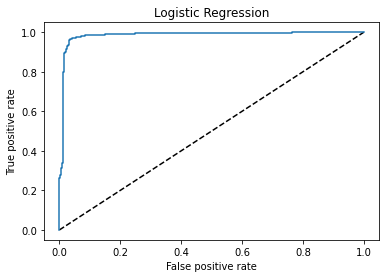

In [31]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()


In [32]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [33]:
print(auc_score)

0.9586031232627482


In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[1263    0]
 [   0 1175]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



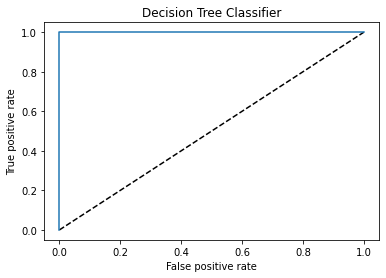

1.0

In [35]:
#Decision Tree Curve
y_pred_prob=dt.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
auc_score

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1263    0]
 [   0 1175]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



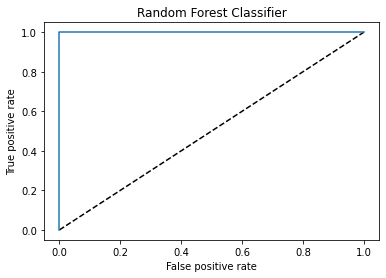

1.0

In [37]:
#Random Forest curve
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

In [38]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9922067268252666
[[1263    0]
 [  19 1156]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1263
           1       1.00      0.98      0.99      1175

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



we are getting highest accuracy score with RandomForestClassifier and DecisionTreeClassifier(100%) but it can be due to overfitting also we will check cross validation scores

In [42]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)

print("Cross validation score of LogisticRegression model :",scr.mean())

Cross validation score of LogisticRegression model : 0.8392258431223949


In [43]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of DecisionTree model :",scr.mean())

Cross validation score of DecisionTree model : 0.9689755210306934


In [44]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of DecisionTree model :",scr.mean())

Cross validation score of DecisionTree model : 0.8922608563849943


In [45]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :",scr.mean())

Cross validation score of SVC model : 0.8420306934444864


Minimum difference in accuracy and cross validation score is for DecisionTreeClassifier(8).So this is our best model.

# Hyper parameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# Creating parameter list to pass in GridSearchCV

parameters={'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [48]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [49]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [50]:
GCV.best_params_ # printing the best parameter found by GridSearchCV

{'criterion': 'gini', 'max_depth': 8}

In [51]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [52]:
accuracy_score(y_test,GCV_pred)

1.0

In [53]:
import joblib
    
joblib.dump(GCV.best_estimator_,"MushroomprojectDTC.obj")

p=joblib.load("MushroomprojectDTC.obj")

p.predict(x_test)


array([0, 1, 0, ..., 1, 1, 0])